In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('../..')

In [3]:
os.getcwd()

'/Users/ylee/Desktop/sars-cov-2/covid-19-staging'

In [4]:
from data_pipelines import kr_covid_data

In [5]:
kr_data = kr_covid_data.get()

In [6]:
cities = kr_data['cities']
total = kr_data['total']
testing = kr_data['testing']

In [7]:
cities['Daegu'].iloc[-5:-1, :]

,date,quarantine,confirmed_acc,death_acc,released_acc,confirmed,death,released
49,2020-04-06,1787,6781,129,4865,13,2,92
50,2020-04-07,1742,6794,134,4918,13,5,53
51,2020-04-08,1705,6803,137,4961,9,3,43
52,2020-04-09,1562,6807,139,5106,4,2,145


In [8]:
total.iloc[-5:-1, :]

,date,quarantine,confirmed_acc,death_acc,released_acc,confirmed,death,released
75,2020-04-05,3591,10237,183,6463,81,6,138
76,2020-04-06,3500,10284,186,6598,47,3,135
77,2020-04-07,3445,10331,192,6694,47,6,96
78,2020-04-08,3408,10384,200,6776,53,8,82


In [9]:
testing.iloc[-5:-1, :]

,date,confirm_rate,confirmed_acc,negative_acc,testing,confirmed,negative
51,2020-04-05,0.023178,10237,431425,19571,81,6693
52,2020-04-06,0.022981,10284,437225,19295,47,5800
53,2020-04-07,0.022623,10331,446323,20650,47,9098
54,2020-04-08,0.022181,10384,457761,17858,53,11438


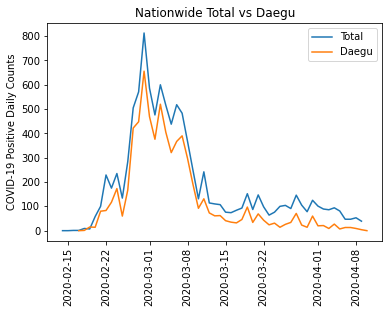

In [10]:
# majority of the cases are from Daegu
plt.plot(testing['date'], testing['confirmed'], label='Total')
plt.plot(cities['Daegu']['date'], cities['Daegu']['confirmed'], label='Daegu')
plt.legend()
plt.ylabel('COVID-19 Positive Daily Counts')
plt.xticks(rotation=90);
plt.title('Nationwide Total vs Daegu');

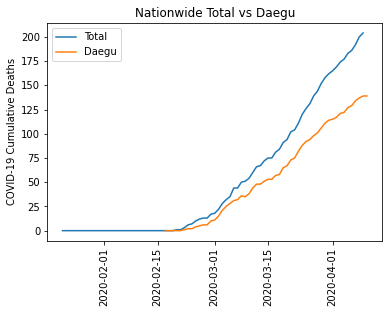

In [11]:
# majority of the cases are from Daegu
plt.plot(total['date'], total['death_acc'], label='Total')
plt.plot(cities['Daegu']['date'], cities['Daegu']['death_acc'], label='Daegu')
plt.legend()
plt.ylabel('COVID-19 Cumulative Deaths')
plt.xticks(rotation=90);
plt.title('Nationwide Total vs Daegu');

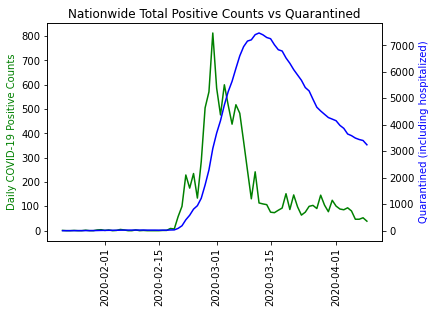

In [12]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax1.plot(total['date'], total['confirmed'], 'g-')
ax2.plot(total['date'], total['quarantine'], 'b-')

ax1.set_ylabel('Daily COVID-19 Positive Counts', color='g')
ax2.set_ylabel('Quarantined (including hospitalized)', color='b')

plt.title('Nationwide Total Positive Counts vs Quarantined');

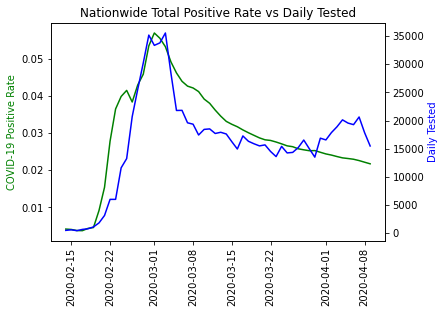

In [13]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax1.plot(testing['date'], testing['confirm_rate'], 'g-')
ax2.plot(testing['date'], testing['testing'], 'b-')

ax1.set_ylabel('COVID-19 Positive Rate', color='g')
ax2.set_ylabel('Daily Tested', color='b')

plt.title('Nationwide Total Positive Rate vs Daily Tested');

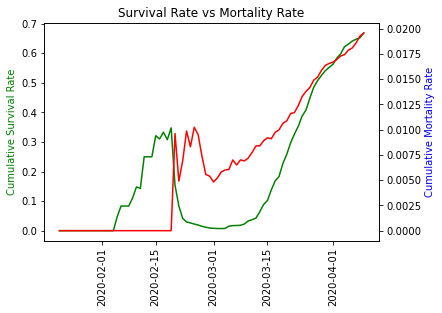

In [14]:
# recovery rate vs mortality rate
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

mortality_rate = total['death_acc']/total['confirmed_acc']
survival_rate = total['released_acc']/total['confirmed_acc']

ax2 = ax1.twinx()
ax1.plot(total['date'], survival_rate, 'g-')
ax2.plot(total['date'], mortality_rate, 'r-')

ax1.set_ylabel('Cumulative Survival Rate', color='g')
ax2.set_ylabel('Cumulative Mortality Rate', color='b')

plt.title('Survival Rate vs Mortality Rate');

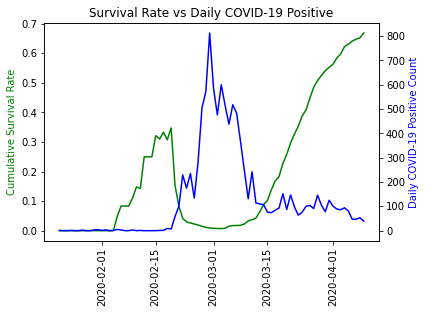

In [15]:
fig, ax1 = plt.subplots()
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax1.plot(total['date'], survival_rate, 'g-')
ax2.plot(total['date'], total['confirmed'], 'b-')

ax1.set_ylabel('Cumulative Survival Rate', color='g')
ax2.set_ylabel('Daily COVID-19 Positive Count', color='b')

plt.title('Survival Rate vs Daily COVID-19 Positive');